In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### importowanie danych z pliku

In [2]:
df = pd.read_csv('./BCL_TaskCreation.csv', sep = ';')
df

,dataStream,rowCount,probingTimestamp
0,BCL_TaskCreation,315349655,2020-01-13 09:33:00.497
1,BCL_TaskCreation,315349655,2020-01-13 09:34:00.157
2,BCL_TaskCreation,314533770,2020-01-11 01:18:00.143
3,BCL_TaskCreation,289249872,2020-04-05 16:10:00.333
4,BCL_TaskCreation,289249872,2020-04-05 16:11:00.883
...,...,...,...
160730,BCL_TaskCreation,289702842,2020-05-02 04:43:00.767
160731,BCL_TaskCreation,289702943,2020-05-02 07:26:01.040
160732,BCL_TaskCreation,289702883,2020-05-02 06:10:00.157
160733,BCL_TaskCreation,289702842,2020-05-02 04:18:00.117


In [3]:
sum(df.duplicated(['dataStream'])) == len(df) - 1

True

w kolumnie `dataStream` występuje tylko jedna wartość, przy analizie danych, taka informacja nic nie wnosi.
Można więc ją usunąć. 

In [4]:
df = df.drop(['dataStream'], axis=1)
df = df.drop_duplicates() 
print(df['probingTimestamp'].dtype)# we have to change that to date
print(df['rowCount'].dtype) # it is good 
sum(df.duplicated(['probingTimestamp'])) == 0 # making sure that there are no duplicates in this column

object
int64


True

zmiana typy `probingTimestamp` z `object` na `datetime`,oraz sortowanie wg tej kolumny.
Ponieważ kolumna `probingTimestamp` nie zawiera duplikatów, możemy użyć jej jako pola `index`

In [5]:
df['probingTimestamp'] = pd.to_datetime(df['probingTimestamp'])
df = df.sort_values('probingTimestamp')
df.set_index('probingTimestamp')

,rowCount
probingTimestamp,
2020-01-10 10:04:18.837,314015548
2020-01-10 10:16:29.063,314015548
2020-01-10 10:17:00.510,314015548
2020-01-10 10:18:00.977,314015548
2020-01-10 10:19:00.610,314015548
...,...
2020-05-02 07:56:00.117,289702943
2020-05-02 07:57:00.537,289702943
2020-05-02 07:58:00.083,289702943


dane są gotowe do zwizualizowania.

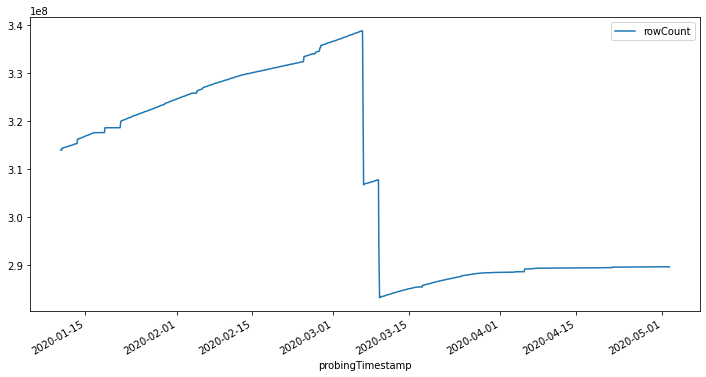

In [6]:
ax = df.plot(x='probingTimestamp', y='rowCount', figsize=(12,6))

<AxesSubplot:title={'center':'mean value per by hour'}, xlabel='probingTimestamp'>

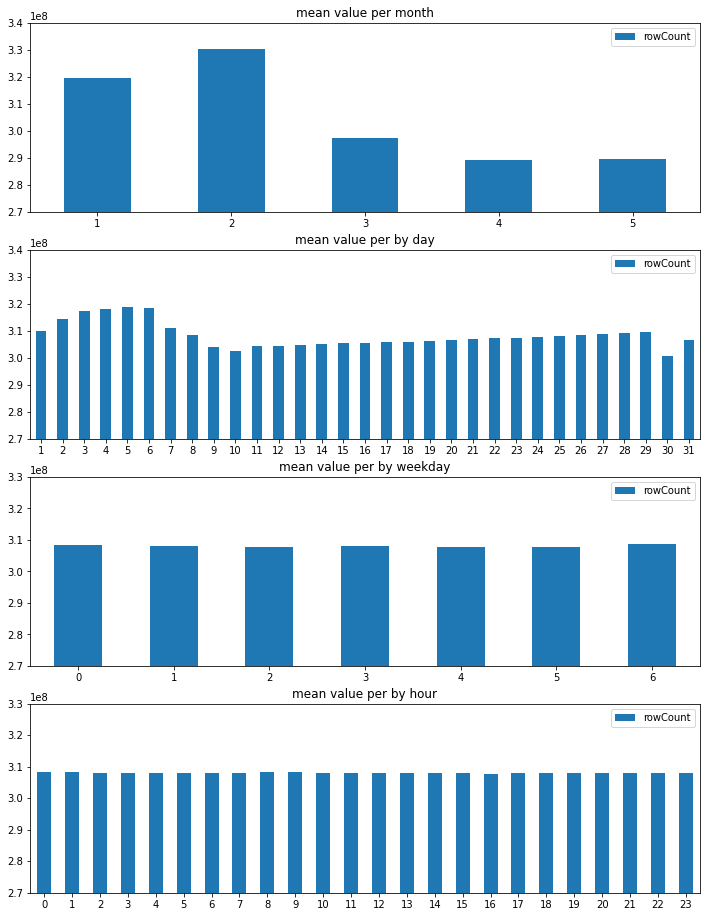

In [7]:
fig, axs = plt.subplots(4, figsize=(12, 16))
[ax.xaxis.label.set_visible(False) for ax in axs] 

df.groupby(df["probingTimestamp"].dt.month).mean().plot(
    title='mean value per month', rot=0, ax=axs[0], kind='bar', ylim=[2.7e8, 3.4e8])
df.groupby(df["probingTimestamp"].dt.day).mean().plot(
    title='mean value per by day', rot=0, ax=axs[1], kind='bar', ylim=[2.7e8, 3.4e8])
df.groupby(df["probingTimestamp"].dt.weekday).mean().plot(
    title='mean value per by weekday', rot=0, ax=axs[2], kind='bar', ylim=[2.7e8, 3.3e8])
df.groupby(df["probingTimestamp"].dt.hour).mean().plot(
    title='mean value per by hour', rot=0, ax=axs[3], kind='bar', ylim=[2.7e8, 3.3e8])

powyższe wykresy nie wskazują na sezonowość danych.
### problemy zaobserwowane w czasie analizy danych
1. powtarzające się wiersze
2.  kolumna posiadająca tą samą wartość w każdej kolumnie zgodnie z założeniem, że ''najciekawsze są dane z największą wariancją''  jest to nic nie wnosząca (nie ciekawa) informacja
3. obserwacje nie są posortowane chronologiczne
4. ? po przygotowaniu danych widać, że obserawacje pojawiają się, co ok minute, ale występują wyjątki. Nie znając jednak kontekstu danych nie można stwierdzić, że to problem.  

In [9]:
def find_duplicates(df: pd.DataFrame) -> pd.DataFrame:
    duplicates = [i for i, d in enumerate(df.duplicated()) if d] # get indexes of duplicates
    print(f'There are {len(duplicates)} duplicated rows in dataframe.')
    return duplicates

In [10]:
def find_irrelevant_columns(df: pd.DataFrame) -> pd.DataFrame:
    new_df = df.copy()  # don't wanna mess with orginal of df
    for column in df.columns:
        if sum(df.duplicated(column)) == len(df) - 1:
            print(
                f'column {column} contains following value in every row: {df[column].values[0]}')


In [11]:
def check_if_sorted(df: pd.DataFrame, column = 'probingTimestamp') -> pd.DataFrame:
    try:
        sorted = df[column].is_monotonic_increasing
    except KeyError as exc:
        raise 'invalid name of column were given'
    if sorted:
        print(f'dataframe is already sorted by {column}')
    else:
        print(f'dataframe is not sorted by {column}')

testowanie działania funkcji

In [12]:
df = pd.read_csv('./BCL_TaskCreation.csv', sep = ';')
find_duplicates(df)
find_irrelevant_columns(df)
check_if_sorted(df)

There are 222 duplicated rows in dataframe.
column dataStream contains following value in every row: BCL_TaskCreation
dataframe is not sorted by probingTimestamp
